# Question 02

#####  Evaluate whether older planes suffer more delays on a year-to-year basis.

In [1]:
# importing the necassary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the cleaned dataset

In [2]:
data_2007 = pd.read_csv(r"D:\User\University\Year 2\Programming for Data Science\Programming Coursework\cleaned data files\data_2007.csv")

In [3]:
# displaying all the columns of the dataset
pd.set_option("display.max_columns", None)
data_2007.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4,11,0,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5,6,0,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6,9,0,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3,8,0,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3,9,0,0,0,0,0,0,0


### Importing the additional cleaned dataset; plane_data.csv

In [4]:
# loading the additional dataset to get more information about planes' manufactured dates
plane_data = pd.read_csv(r"D:\User\University\Year 2\Programming for Data Science\Programming Coursework\cleaned data files\plane_data.csv")

In [5]:
# a view of the data
plane_data.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0
1,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0
2,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986.0
3,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999.0
4,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0


### Renaming the column 'tailnum' to 'TailNum', combinining the 2 datasets

In [6]:
# renaming the column so that it is the same in both datasets (gives the same information)
plane_data = plane_data.rename(columns = {'tailnum':'TailNum'})
plane_data.head(0)

,TailNum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year


In [7]:
# filtering the necassary columns 
filtered_set_v3 = data_2007[["Year", "DepTime", "CRSDepTime", "ArrDelay", "DepDelay", "FlightNum", "TailNum", 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

In [8]:
# combining the the two datasets using the the common column "TailNum", where the IDs are matching
merged_set = filtered_set_v3.merge(plane_data, on = 'TailNum', how = 'inner') 
merged_set.shape

(6319346, 20)

In [9]:
# checking for any null values in the merged set
merged_set.isnull().sum()

Year                     0
DepTime              38714
CRSDepTime               0
ArrDelay             53086
DepDelay             38714
FlightNum                0
TailNum                  0
CarrierDelay             0
WeatherDelay             0
NASDelay                 0
SecurityDelay            0
LateAircraftDelay        0
type                     0
manufacturer             0
issue_date               0
model                    0
status                   0
aircraft_type            0
engine_type              0
year                     0
dtype: int64

### Checking for the distributions of the columns with null values for Imputation

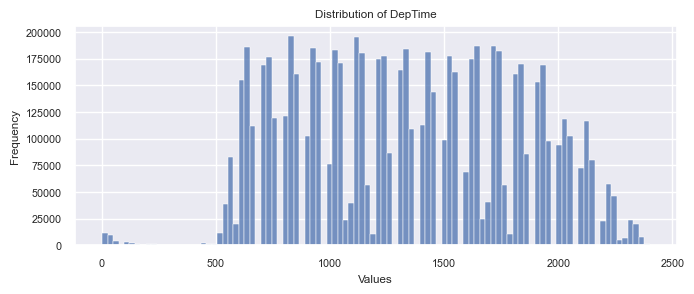

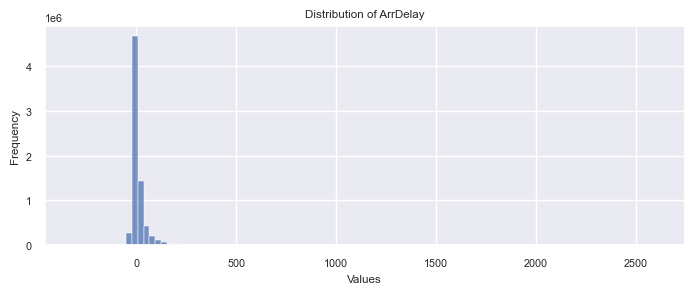

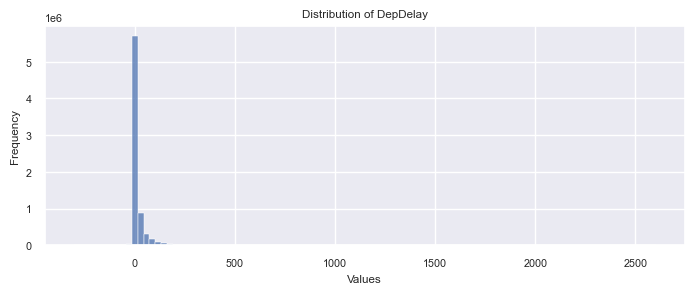

In [10]:
# displaying the distributions of the variables that contained missing values to make decisions on imputation
columns = ['DepTime', 'ArrDelay', 'DepDelay']

for column in columns:
    # Checking to make sure that the null values were not removed accidently
    if data_2007[column].isnull().any():
        # Displaying histogram plots for the columns with missing values
        plt.figure(figsize = (7,3))
        sns.set(font_scale = 0.7)
        ax = sns.histplot(data=data_2007, x=column, bins=100)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel('Values')
        ax.set_ylabel('Frequency')
        plt.tight_layout()
        plt.show()  

In [11]:
# imputating the missing values depending on the distributions by observing the above plots

merged_set['DepTime'].fillna(merged_set['DepTime'].mean(), inplace=True)
merged_set['ArrDelay'].fillna(merged_set['ArrDelay'].median(), inplace=True)
merged_set['DepDelay'].fillna(merged_set['DepDelay'].median(), inplace=True)

In [12]:
merged_set.head()

,Year,DepTime,CRSDepTime,ArrDelay,DepDelay,FlightNum,TailNum,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2007,1430.0,1420,3.0,10.0,2386,N611SW,0,0,0,0,0,Corporation,BOEING,10/20/1995,737-3H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1995.0
1,2007,2024.0,2005,21.0,19.0,1420,N611SW,1,0,2,0,18,Corporation,BOEING,10/20/1995,737-3H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1995.0
2,2007,620.0,620,-4.0,0.0,1536,N611SW,0,0,0,0,0,Corporation,BOEING,10/20/1995,737-3H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1995.0
3,2007,1858.0,1835,18.0,23.0,522,N611SW,4,0,0,0,14,Corporation,BOEING,10/20/1995,737-3H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1995.0
4,2007,1724.0,1700,18.0,24.0,522,N611SW,2,0,0,0,16,Corporation,BOEING,10/20/1995,737-3H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1995.0


In [13]:
# renaming the last column 'year' with MFR year (Manufacturing Year)
merged_set = merged_set.rename(columns = {'year':'MFR Year'})
# converting the years from type float to integer for better display
merged_set['MFR Year'] = merged_set['MFR Year'].round().astype(int)
merged_set.head(2)

,Year,DepTime,CRSDepTime,ArrDelay,DepDelay,FlightNum,TailNum,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,MFR Year
0,2007,1430.0,1420,3.0,10.0,2386,N611SW,0,0,0,0,0,Corporation,BOEING,10/20/1995,737-3H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1995
1,2007,2024.0,2005,21.0,19.0,1420,N611SW,1,0,2,0,18,Corporation,BOEING,10/20/1995,737-3H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1995


In [ ]:
# looking at the number of unique values for the following columns for possible exclusions 

In [14]:
merged_set['engine_type'].value_counts()

engine_type
Turbo-Fan        4208642
Turbo-Jet        1849666
Turbo-Prop        229348
Reciprocating      26610
4 Cycle             3197
Turbo-Shaft         1883
Name: count, dtype: int64

In [15]:
merged_set['status'].value_counts()

status
Valid    6319346
Name: count, dtype: int64

In [16]:
# excluding the column 'status' since all are valid
merged_set.drop('status', axis=1, inplace=True)

In [17]:
merged_set.head(2)

,Year,DepTime,CRSDepTime,ArrDelay,DepDelay,FlightNum,TailNum,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,aircraft_type,engine_type,MFR Year
0,2007,1430.0,1420,3.0,10.0,2386,N611SW,0,0,0,0,0,Corporation,BOEING,10/20/1995,737-3H4,Fixed Wing Multi-Engine,Turbo-Fan,1995
1,2007,2024.0,2005,21.0,19.0,1420,N611SW,1,0,2,0,18,Corporation,BOEING,10/20/1995,737-3H4,Fixed Wing Multi-Engine,Turbo-Fan,1995


### Inserting a new column to compute the Ages of identified planes

In [18]:
# adding a new column to assess the age
merged_set['Age'] = merged_set['Year'] - merged_set['MFR Year']

In [19]:
merged_set.head(2)

,Year,DepTime,CRSDepTime,ArrDelay,DepDelay,FlightNum,TailNum,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,aircraft_type,engine_type,MFR Year,Age
0,2007,1430.0,1420,3.0,10.0,2386,N611SW,0,0,0,0,0,Corporation,BOEING,10/20/1995,737-3H4,Fixed Wing Multi-Engine,Turbo-Fan,1995,12
1,2007,2024.0,2005,21.0,19.0,1420,N611SW,1,0,2,0,18,Corporation,BOEING,10/20/1995,737-3H4,Fixed Wing Multi-Engine,Turbo-Fan,1995,12


In [20]:
# observing for any inputs of invalid MFR dates
merged_set['MFR Year'].value_counts()

MFR Year
2001    589399
2000    491692
2002    463663
1999    451740
2003    446102
2004    418484
1998    349228
2005    329469
2006    240929
1988    213468
1991    200735
1996    200237
1992    188371
1990    180952
1987    178434
1997    176906
1994    161115
1995    154229
1989    154002
1993    144090
1985    134007
1986    128800
2007     87337
1968     34682
1984     34086
1983     25420
1967     19268
1969     16547
1979     16285
1978     14079
1976     12758
1980     11400
1975     10143
1977      6901
1982      6844
0         6116
1973      4284
1970      2870
1959      2461
1966      1663
1963      1628
1974      1508
1971      1502
1964      1439
1962      1402
1965      1295
1957       857
1956       265
1972       254
Name: count, dtype: int64

In [21]:
# sorting the ages in ascending order
merged_set['Age'].value_counts().sort_index()

Age
0        87337
1       240929
2       329469
3       418484
4       446102
5       463663
6       589399
7       491692
8       451740
9       349228
10      176906
11      200237
12      154229
13      161115
14      144090
15      188371
16      200735
17      180952
18      154002
19      213468
20      178434
21      128800
22      134007
23       34086
24       25420
25        6844
27       11400
28       16285
29       14079
30        6901
31       12758
32       10143
33        1508
34        4284
35         254
36        1502
37        2870
38       16547
39       34682
40       19268
41        1663
42        1295
43        1439
44        1628
45        1402
48        2461
50         857
51         265
2007      6116
Name: count, dtype: int64

In [22]:
# removing all the records with invalid or unreasonable age labels
valid_age = (merged_set.Age >= 0) & (merged_set.Age <= 150)
filtered_merged_set = merged_set.loc[valid_age]
filtered_merged_set['Age'].value_counts().sort_index()

Age
0      87337
1     240929
2     329469
3     418484
4     446102
5     463663
6     589399
7     491692
8     451740
9     349228
10    176906
11    200237
12    154229
13    161115
14    144090
15    188371
16    200735
17    180952
18    154002
19    213468
20    178434
21    128800
22    134007
23     34086
24     25420
25      6844
27     11400
28     16285
29     14079
30      6901
31     12758
32     10143
33      1508
34      4284
35       254
36      1502
37      2870
38     16547
39     34682
40     19268
41      1663
42      1295
43      1439
44      1628
45      1402
48      2461
50       857
51       265
Name: count, dtype: int64

In [23]:
# number of records removed due to invalid ages recorded (i.e 2006) 
merged_set.shape[0] - filtered_merged_set.shape[0]

6116

In [24]:
filtered_merged_set_v1 = filtered_merged_set.groupby('Age')[['ArrDelay', 'DepDelay']].mean()
TotDelay = filtered_merged_set_v1[['ArrDelay', 'DepDelay']].sum(axis=1)

# adding the new column to the dataframe
filtered_merged_set_v1['TotDelay'] = TotDelay

filtered_merged_set_v1

,ArrDelay,DepDelay,TotDelay
Age,,,
0,7.833392,10.883154,18.716546
1,8.377273,10.964766,19.342039
2,9.091766,11.164507,20.256273
3,9.309321,11.476133,20.785454
4,11.086406,12.119917,23.206323
5,10.724030,11.662268,22.386298
6,8.521806,9.768630,18.290437
7,9.287942,10.746547,20.034489
8,10.115569,11.641825,21.757394


## Plotting a line chart

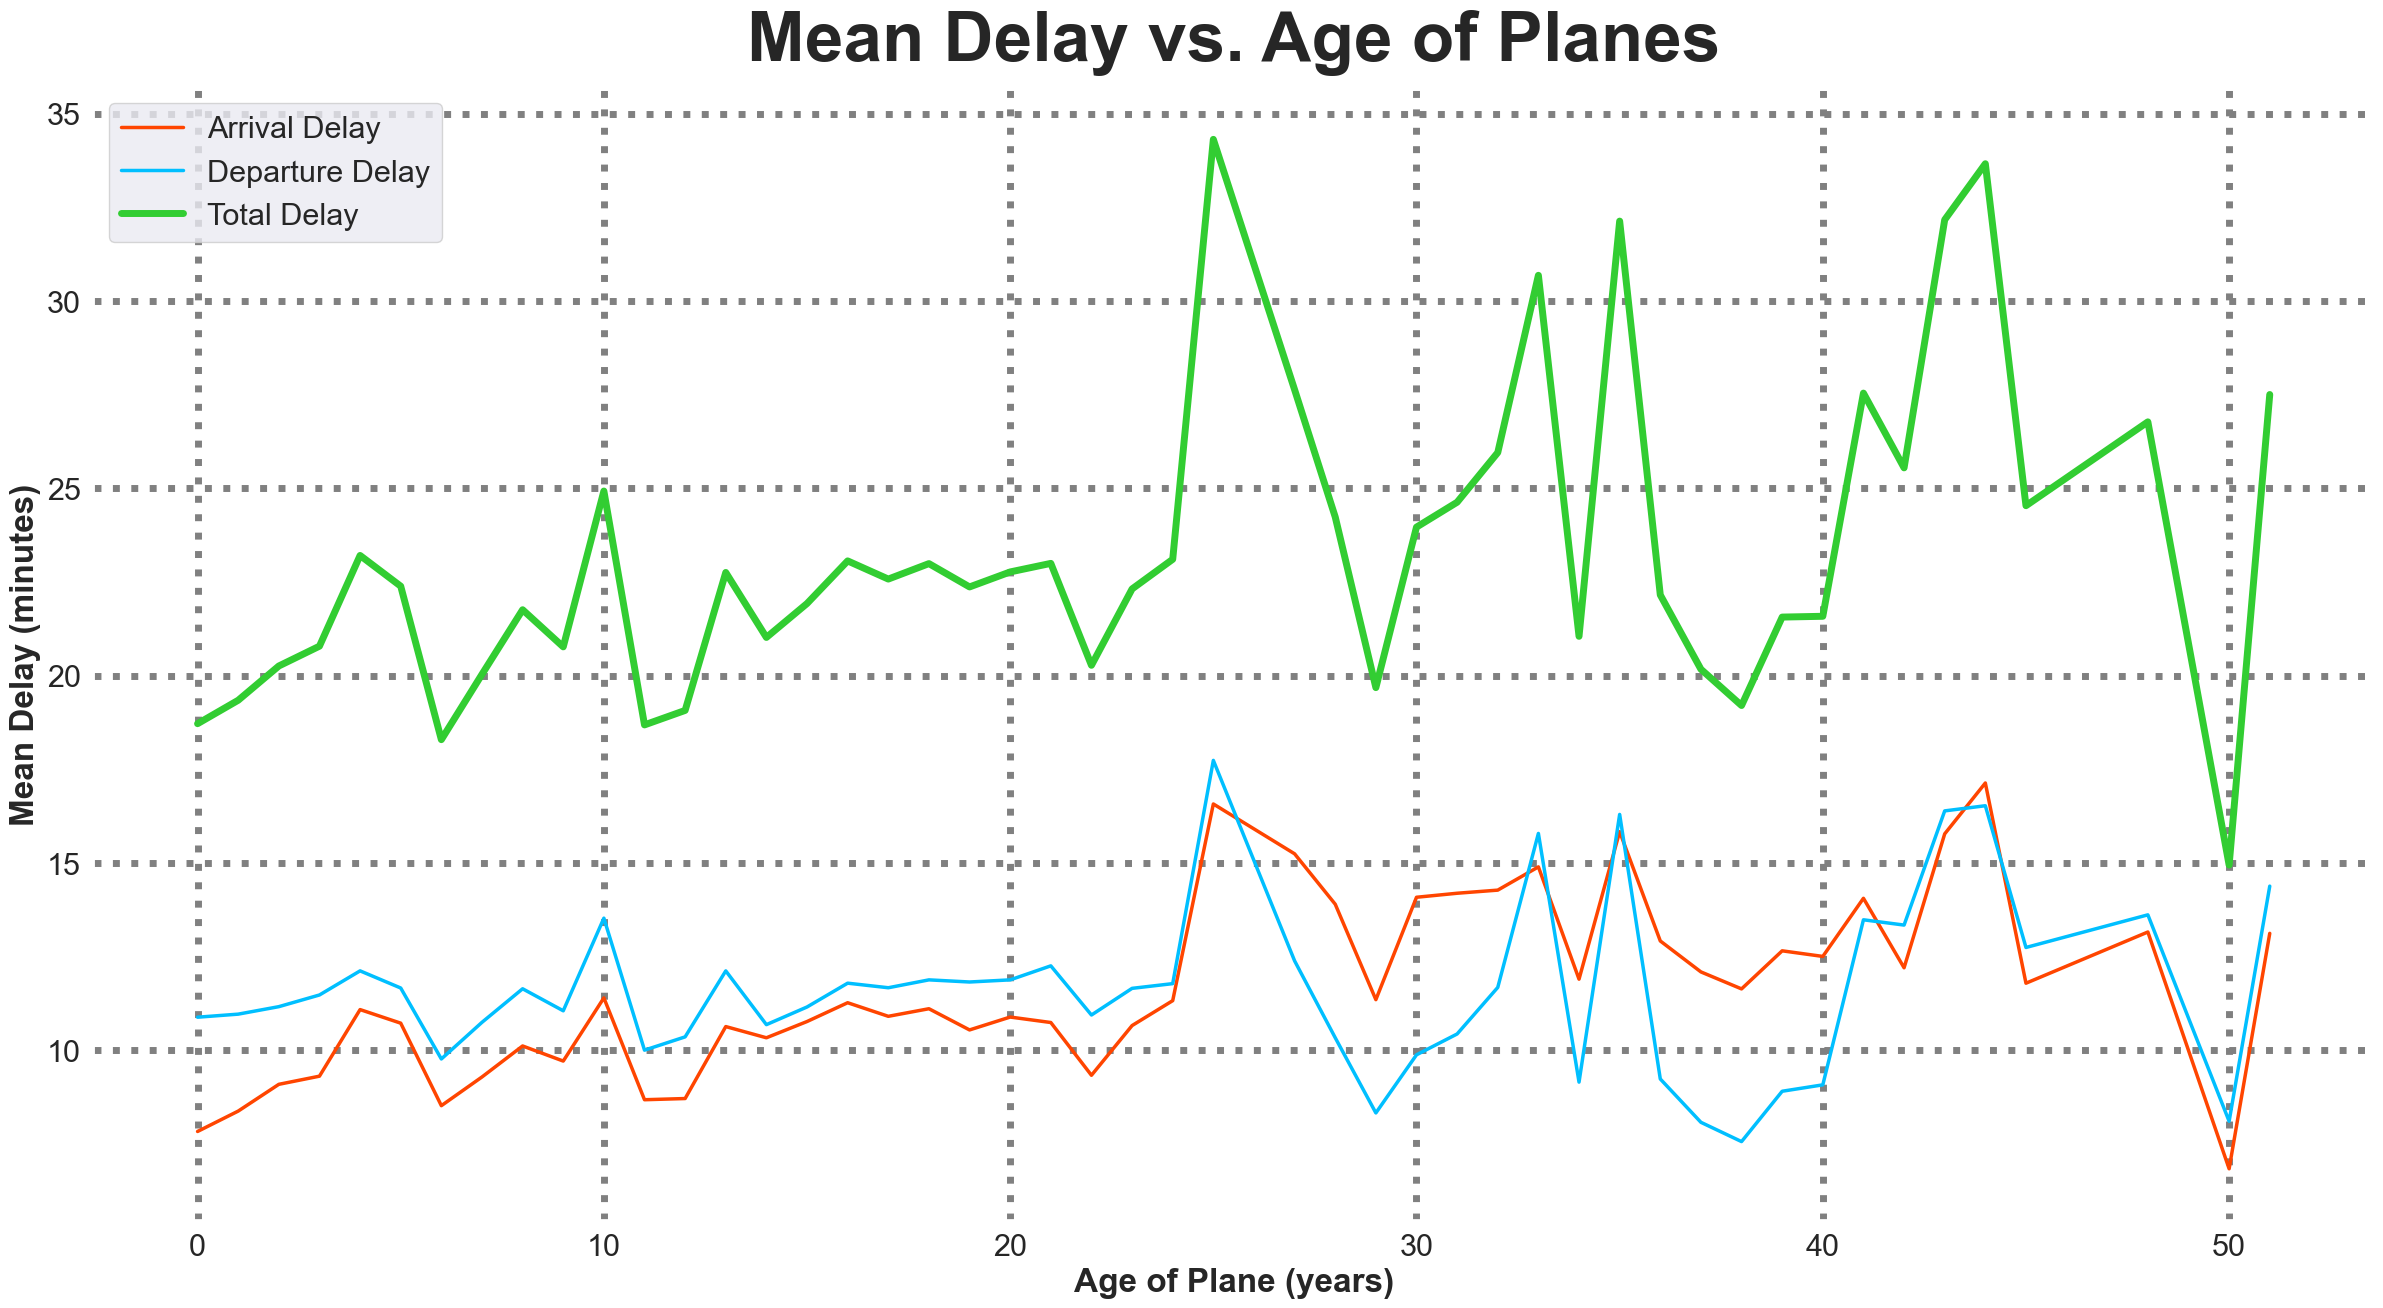

In [29]:
plt.figure(figsize=(100, 50))
sns.set(font_scale = 2)

ax = plt.subplot(331)

# Line plots for ArrDelay, DepDelay, and TotDelay against Age of Planes
ax.plot(filtered_merged_set_v1.index, filtered_merged_set_v1['ArrDelay'], label='Arrival Delay', linewidth=2.5, color='orangered')
ax.plot(filtered_merged_set_v1.index, filtered_merged_set_v1['DepDelay'], label='Departure Delay', linewidth=2.5, color='deepskyblue')
ax.plot(filtered_merged_set_v1.index, filtered_merged_set_v1['TotDelay'], linewidth=5, label='Total Delay', color='limegreen')

ax.set_xlabel('Age of Plane (years)', weight='bold')
ax.set_ylabel('Mean Delay (minutes)', weight='bold')
ax.set_facecolor('white')

ax.set_title('Mean Delay vs. Age of Planes', fontsize=50, fontweight='bold', pad=20)

plt.grid(color='gray', linestyle='dotted', linewidth=5)
ax.legend(loc='upper left')
plt.show()

### Looking for any other linear relationships between Age of Planes and each delay component

In [30]:
# a filtered set with all delay variables to study any relationships further

filtered_merged_set_v2 = filtered_merged_set.groupby('Age')[['ArrDelay', 'DepDelay','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay' ]].mean()
TotDelay = filtered_merged_set_v1[['ArrDelay', 'DepDelay']].sum(axis=1)
# adding the new column to the dataframe
filtered_merged_set_v2['TotDelay'] = TotDelay

In [31]:
filtered_merged_set_v2.reset_index(inplace=True)
filtered_merged_set_v2.head()

,Age,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotDelay
0,0,7.833392,10.883154,2.546538,0.524944,3.823248,0.031762,5.315594,18.716546
1,1,8.377273,10.964766,3.165040,0.543172,3.538291,0.037625,5.579519,19.342039
2,2,9.091766,11.164507,3.522975,0.654462,3.571092,0.028768,5.462229,20.256273
3,3,9.309321,11.476133,3.584245,0.819828,3.524586,0.023666,5.319004,20.785454
4,4,11.086406,12.119917,4.881341,1.071170,3.929552,0.026606,4.823574,23.206323


## A figure of a heatmap

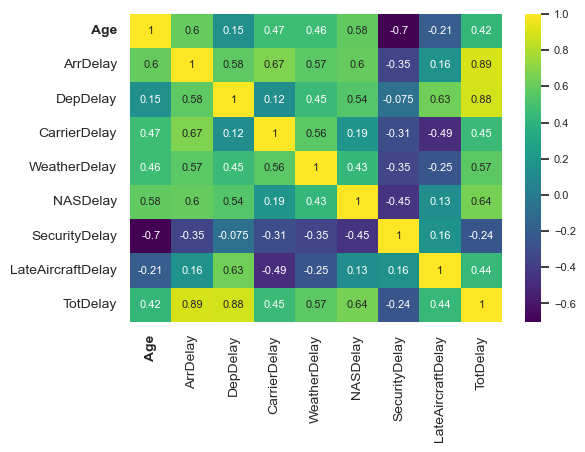

In [32]:
# checking for any correlations between Age and other Delay factors

corr_matrix = filtered_merged_set_v2.corr()

plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="viridis", annot_kws={"fontsize": 8})

for label in heatmap.get_yticklabels():
    if label.get_text() == 'Age':
        label.set_weight('bold')
        
for label in heatmap.get_xticklabels():
    if 'Age' in label.get_text():
        label.set_weight('bold')

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=8) 

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()